# 🎵 Music Genre Classification
By *Artur Gomes Simão*

This notebook uses the Kaggle dataset 'Music Genre Classification' (https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download), to classify music based on its general characteristics, using different AI strategies and methods.

## First Steps

Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [78]:
genre = pd.read_csv('music_genre/music_genre.csv')
genre.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [79]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In this notebook, we are going to use the principal elements to classify the music genre, using the parameter 'features'.

In [80]:
features = [
    'Popularity',
    'danceability', 
    'energy',
    'liveness',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'valence',
    'tempo'
]

Additionally, there are some columns with null data. Therefore, we will ignore this missing information.


In [81]:
genre = genre.dropna(subset=features)

Another interesting thing to do is create the 'Genre' parameter, since 'Class' contains an integer that represents that genre.


In [82]:
genre_mapping = {
    0: 'Acoustic/Folk',
    1: 'Alt Music',
    2: 'Blues',
    3: 'Bollywood',
    4: 'Country',
    5: 'HipHop',
    6: 'Indie',
    7: 'Instrumental',
    8: 'Metal',
    9: 'Pop',
    10: 'Rock'
}
genre['Genre'] = genre['Class'].map(genre_mapping)

With these mapping, we can see the name of the genre.

## Exploratory Analisys

In the following heat map, we can get a small idea of ​​how the chosen features influence the genre of the music.


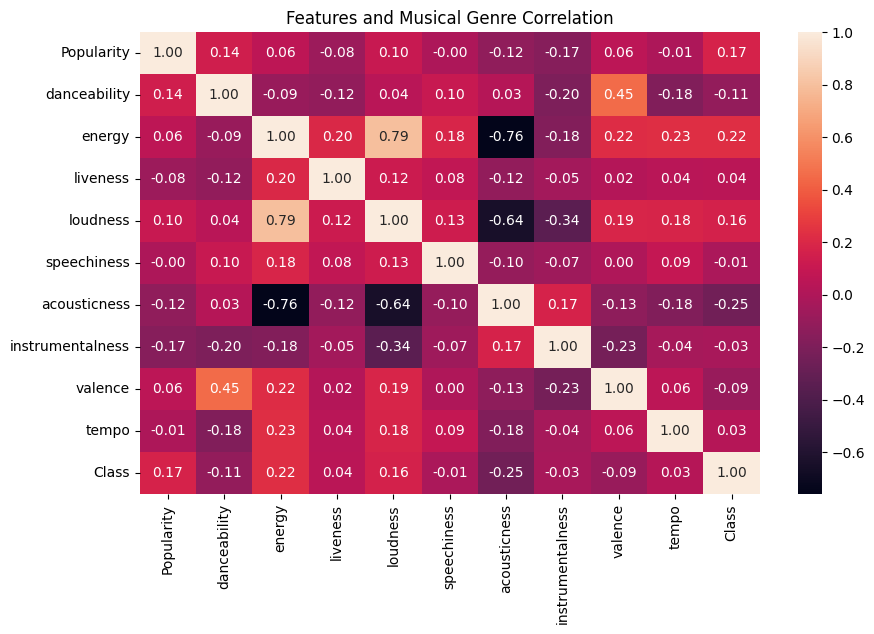

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(genre[features + ['Class']].corr(), annot=True, fmt=".2f")
plt.title("Features and Musical Genre Correlation")
plt.show()


From this heat map, we can infer that the musical genre's main characteristics are energy and acoustics, but all features have significant weight.

The folliwing graphs shows the distributions between the genres and each feature.

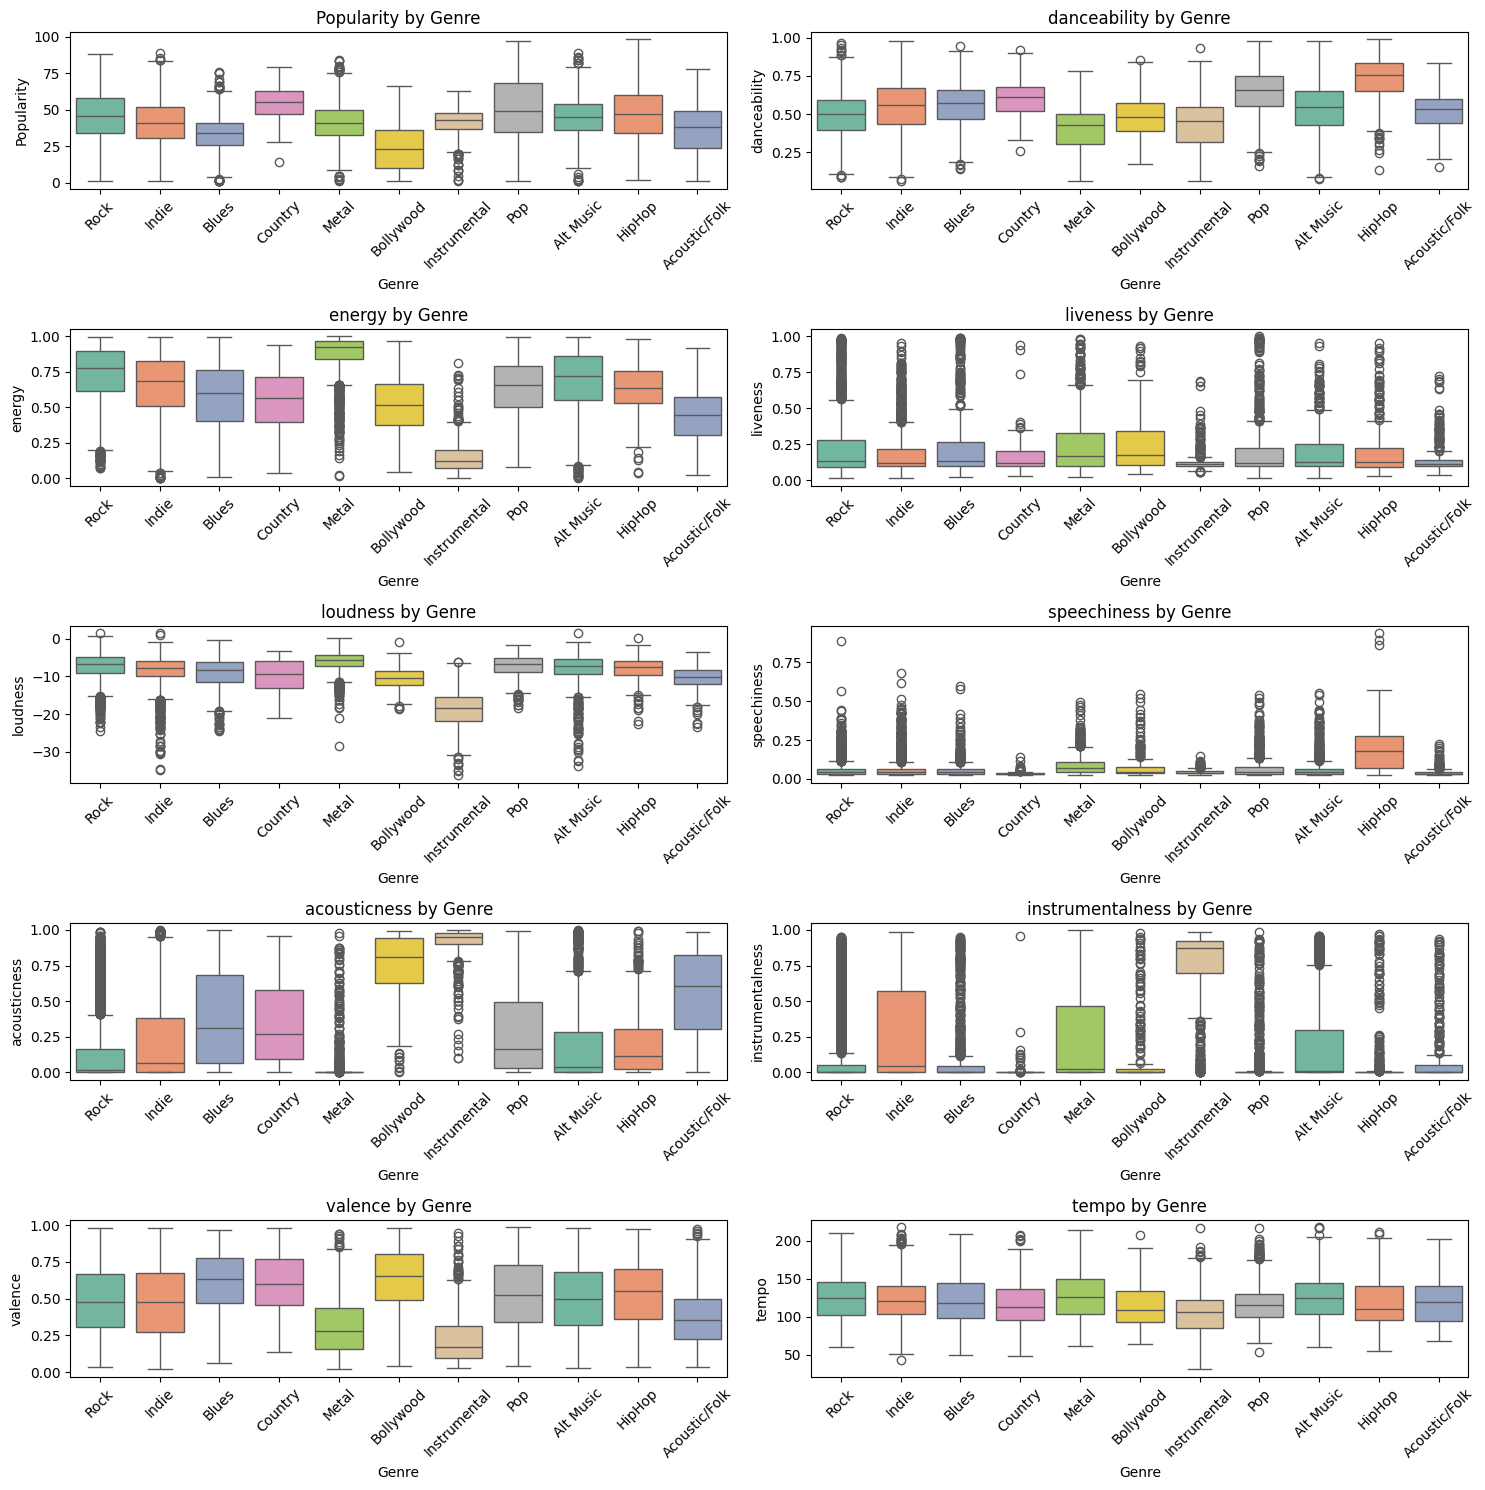

In [84]:
plt.figure(figsize=(15,15))

for i, feature in enumerate(features):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x='Genre', y=feature, data=genre, hue='Genre', palette='Set2')
    plt.title(f'{feature} by Genre')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


From these graphs, we can draw some conclusions about musical gender distributions, such as:


### 1. Key Distinguishing Features 

The most useful features for separating the genres are those with the greatest variation in medians and distribution boxes:

| Feature | Extreme Genres (Maximum Difference) | Conclusion |
| :--- | :--- | :--- |
| **Acousticness** | Blues/Acoustic/Folk (High) vs. Metal/Pop/HipHop (Low) | Excellent for distinguishing organic from produced/electric genres. |
| **Energy** | Metal/Rock (High) vs. Blues/Acoustic/Folk (Low) | Excellent for differentiating intensity and production style. |
| **Loudness** | Metal/Rock (High) vs. Blues/Acoustic/Folk (Low) | Follows Energy, reinforcing the distinction in mastering/production. |
| **Speechiness** | HipHop (High) vs. All Others (Low) | Unique and Crucial for isolating HipHop due to the presence of rap and spoken lyrics. |

---

### 2. Genre-Specific Musical Signatures

Each genre exhibits a unique signature based on the concentration of its features:

* HipHop: Characterized by the highest Danceability and, most distinctively, Speechiness. It is almost entirely non-acoustic (low Acousticness).
* Metal: Features the highest Energy and Loudness, with very low Acousticness. It tends to have the lowest Valence (less "happy").
* Acoustic/Folk & Blues: Clearly defined by the highest Acousticness and, consequently, the lowest Energy and Loudness. Their low Danceability is also notable.
* Bollywood: The most positive (Valence high) and highly Danceable genre, with a strong presence of Instrumental tracks.
* Pop: High Energy and low Acousticness and Instrumentalness, indicating highly produced and vocal-centric music.

---

### 3. Least Useful Feature

* **Tempo (BPM):** This is the least discriminatory feature. The distribution of BPM is very similar and centralized across all genres, making it weak for classification.

---

### 4. Outliers

In some genders (like liveness, instrumentalness, acousticness and speechness), we can see lots of dots that represents outliers. These outliers means that some samples significantly deviates from other observations in the dataset.


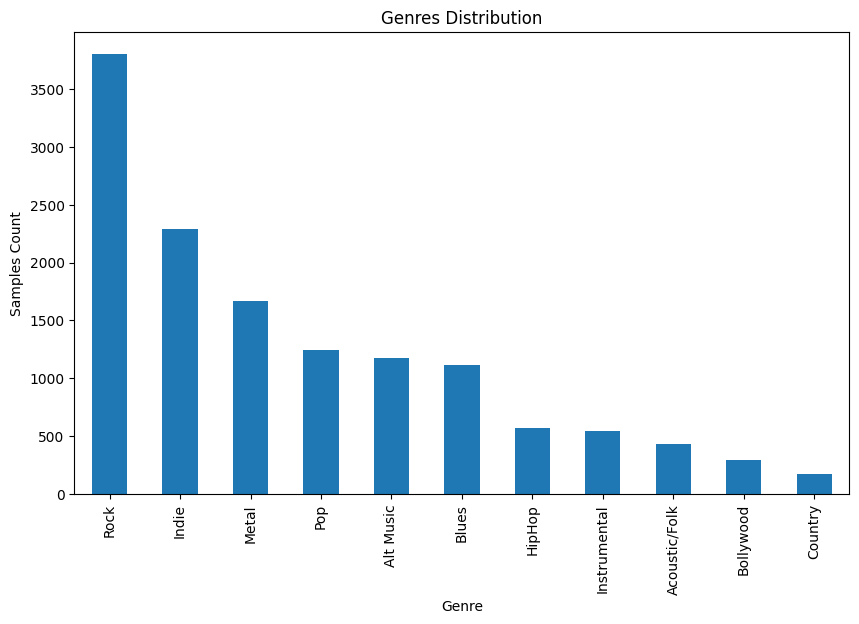

In [85]:
genre_counts = genre['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Samples Count')
plt.show()

This last graph shows the distribution of samples of each class. As we can see, there are some classes with many samples and others with few.


## Pre-Processing

In the exploratory analysis phase, we were able to identify two main problems that will be corrected next: outliers and sample balancing.


Importing libraries for corrections:

In [86]:
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from imblearn.over_sampling import SMOTE

Now we define the x(input) and y(output) axis:

In [87]:
x_val = genre[features]
y_val = genre['Class']

First, to remove the outliers, we are going to use the IQR method:

In [88]:
Q1 = x_val.quantile(0.25)
Q3 = x_val.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~((x_val < lower_bound) | (x_val > upper_bound)).any(axis=1)
x_filtered = x_val[mask]
y_filtered = y_val[mask]

print(f"Number of original samples: {len(x_val)}")
print(f"Filtered samples: {len(x_filtered)}")
print(f"Samples removed: {len(x_val) - len(x_filtered)}")

print(f'Quantity of samples per genre after outlier removal:\n{y_filtered.value_counts()}')



Number of original samples: 13306
Filtered samples: 8989
Samples removed: 4317
Quantity of samples per genre after outlier removal:
Class
10    2968
6     1445
8      976
9      961
2      860
1      817
0      372
3      197
5      195
4      156
7       42
Name: count, dtype: int64


Now we need to balance the number of samples. For this we will use SMOTE algorithm to synthesize new samples in minority classes.
 

In [89]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_filtered, y_filtered)

print("Before SMOTE:\n", y_filtered.value_counts())
print("\nAfter SMOTE:\n", y_smote.value_counts())

Before SMOTE:
 Class
10    2968
6     1445
8      976
9      961
2      860
1      817
0      372
3      197
5      195
4      156
7       42
Name: count, dtype: int64

After SMOTE:
 Class
10    2968
6     2968
2     2968
4     2968
8     2968
3     2968
9     2968
5     2968
1     2968
0     2968
7     2968
Name: count, dtype: int64


Now, we need to split the dataset into training (80%) and testing (20%) sets:


In [90]:

x_train, x_test, y_train, y_test = train_test_split(
    x_smote, y_smote,
    test_size=0.2,
    random_state=42,
    stratify=y_smote
)

With these steps, we were able to begin the classification process.


## Logistic Regretion

Importing libraries:

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

To apply the model, we need to normalize the data and then apply logistic regression. Note that the maximum number of iterations used was 5000 to allow the model time to learn, and the 'saga' parameter was used because it is efficient with large databases.
:


In [92]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000, solver='saga'))
])

scores = cross_val_score(pipeline, x_train, y_train, cv=11, scoring='accuracy')

print(f'Accuracy: {scores.mean():.4f}')
print(f'Accuracy: {scores.mean() * 100:.2f}%')

Accuracy: 0.4616
Accuracy: 46.16%


This shows that the accuracy using this model is 46.16% (a very low result). To verify more informations about the training, we will use the folliwing script:

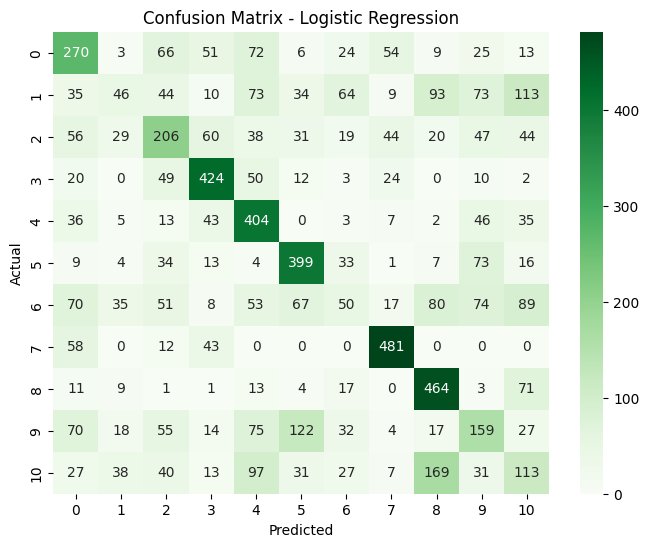


Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       593
           1       0.25      0.08      0.12       594
           2       0.36      0.35      0.35       594
           3       0.62      0.71      0.67       594
           4       0.46      0.68      0.55       594
           5       0.57      0.67      0.61       593
           6       0.18      0.08      0.12       594
           7       0.74      0.81      0.77       594
           8       0.54      0.78      0.64       594
           9       0.29      0.27      0.28       593
          10       0.22      0.19      0.20       593

    accuracy                           0.46      6530
   macro avg       0.42      0.46      0.43      6530
weighted avg       0.42      0.46      0.43      6530



In [93]:
pipeline.fit(x_train, y_train)
y_pred_lr = pipeline.predict(x_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

With these metrics (Precision = 0.42 | Recall = 0.46 | F1-Score = 0.43) and the confusion matrix, we can conclude that the logistic regression model showed a low capacity for generalization. This is mainly because it is a linear model, and predicting a musical genre involves many variables.


## Decision Tree

Importing libraries:

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Training model with 'entropy' parameter:

In [95]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=999)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_dt): .4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%')

Accuracy:  0.6464
Accuracy: 64.64%


This shows that the decision tree model has a accuracy of 64.64% (good result). Let's see the confusion matrix and the metrics.

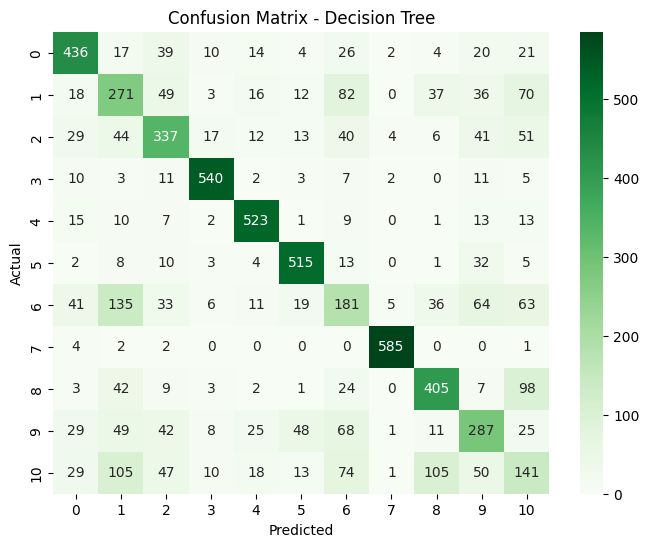


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       593
           1       0.40      0.46      0.42       594
           2       0.58      0.57      0.57       594
           3       0.90      0.91      0.90       594
           4       0.83      0.88      0.86       594
           5       0.82      0.87      0.84       593
           6       0.35      0.30      0.32       594
           7       0.97      0.98      0.98       594
           8       0.67      0.68      0.68       594
           9       0.51      0.48      0.50       593
          10       0.29      0.24      0.26       593

    accuracy                           0.65      6530
   macro avg       0.64      0.65      0.64      6530
weighted avg       0.64      0.65      0.64      6530



In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

With these metrics (Precision = 0.64 | Recall = 0.65 | F1-Score = 0.64) and the confusion matrix, we can conclude that the decision tree model showed a satisfactory performance. This results shows that the decision tree model is very good for balanced databases.



## SVM

Importing libraries:

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Just like in the logistic regression model, we need to normalize the data before training the model. After that, during training, we use the regularization parameter 'C' as 100, improving the training:


In [98]:
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=100, gamma='scale'))
])

svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%')

Accuracy: 0.7411944869831547
Accuracy: 74.12%


Now for the other metrics:

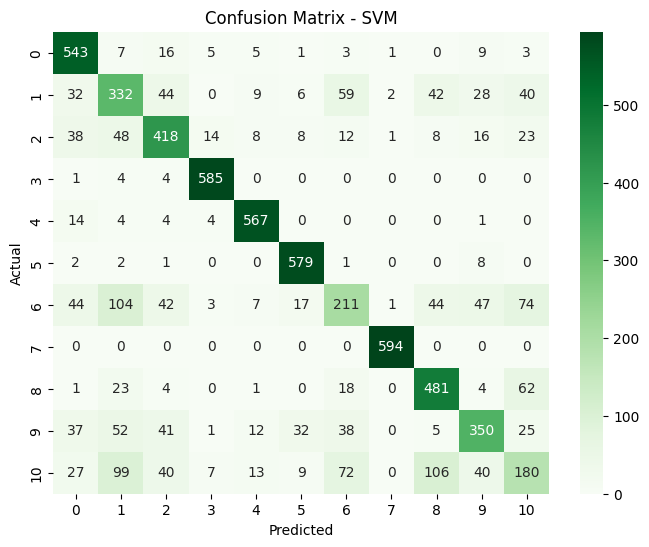


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       593
           1       0.49      0.56      0.52       594
           2       0.68      0.70      0.69       594
           3       0.95      0.98      0.96       594
           4       0.91      0.95      0.93       594
           5       0.89      0.98      0.93       593
           6       0.51      0.36      0.42       594
           7       0.99      1.00      1.00       594
           8       0.70      0.81      0.75       594
           9       0.70      0.59      0.64       593
          10       0.44      0.30      0.36       593

    accuracy                           0.74      6530
   macro avg       0.73      0.74      0.73      6530
weighted avg       0.73      0.74      0.73      6530



In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

With the metrics (Precision = 0.73 | Recall = 0.74 | F1 Score = 0.73) and the confusion matrix, it is possible to state that the SVM model is much more robust than the previous ones because it is highly effective in high-dimensional spaces, which is very useful in this case.


## MLP

Importing libraries:

In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


To train this model, we first normalized the data and then performed the training. In this case, we used 3 layers of neurons (300, 150, and 75 neurons) and 500 iterations.


In [101]:
mlp_model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(300, 150, 75), activation='relu', max_iter=500, random_state=999))
])

mlp_model.fit(x_train, y_train)

y_pred_mlp = mlp_model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100:.2f}%')


Accuracy: 0.758499234303216
Accuracy: 75.85%


Checking the other metrics:

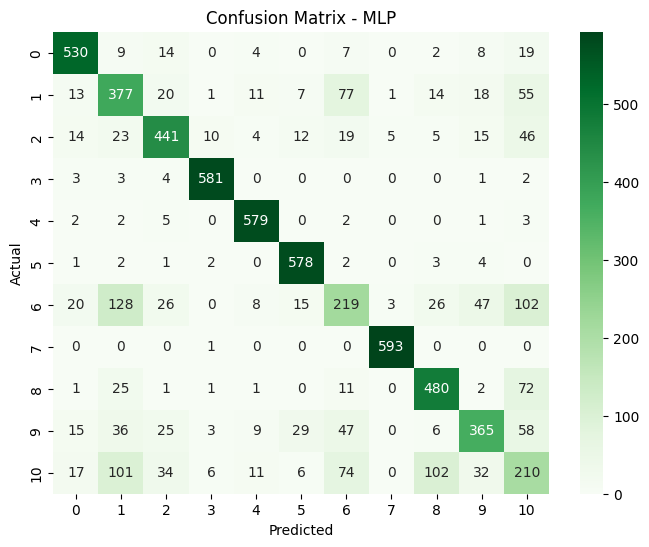


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       593
           1       0.53      0.63      0.58       594
           2       0.77      0.74      0.76       594
           3       0.96      0.98      0.97       594
           4       0.92      0.97      0.95       594
           5       0.89      0.97      0.93       593
           6       0.48      0.37      0.42       594
           7       0.99      1.00      0.99       594
           8       0.75      0.81      0.78       594
           9       0.74      0.62      0.67       593
          10       0.37      0.35      0.36       593

    accuracy                           0.76      6530
   macro avg       0.75      0.76      0.75      6530
weighted avg       0.75      0.76      0.75      6530



In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

This metrics (Precision = 0.75 | Recall = 0.76 | F1 Score = 0.75) and the confusion matrix, shows that the MLP model is the best for this classification with multiple features and achieves the goal of 75% accuracy. This is due to the model's ability to model complex non-linear relationships in the data, which is the case with this dataset. 





## Conclusions

Classifying musical genres based on basic characteristics such as popularity, tempo (bpm), and sonic characteristics (acousticness, energy, etc.) is a very complex process that requires addressing several non-linear perspectives. Therefore, based on the analysis, the MLP model performed best among the others (75,85% accuracy).



The applied preprocessing techniques were also very useful in training the models. Removing outliers and missing data helped in better generalizing the model (ignoring very specific cases). Furthermore, sample synthesis using SMOTE proved essential to improve the imbalance between classes. Although this technique, in a way, 'creates' new samples, it's important to emphasize that music is very broad and often doesn't follow a specific rule, so the most commonly used parameters in synthesis were employed, resulting in better standardization.


Moving on to an analysis of the results of the best model (MLP), a graph was plotted below showing the model's errors and successes on the test set, as well as the average confidence per class.


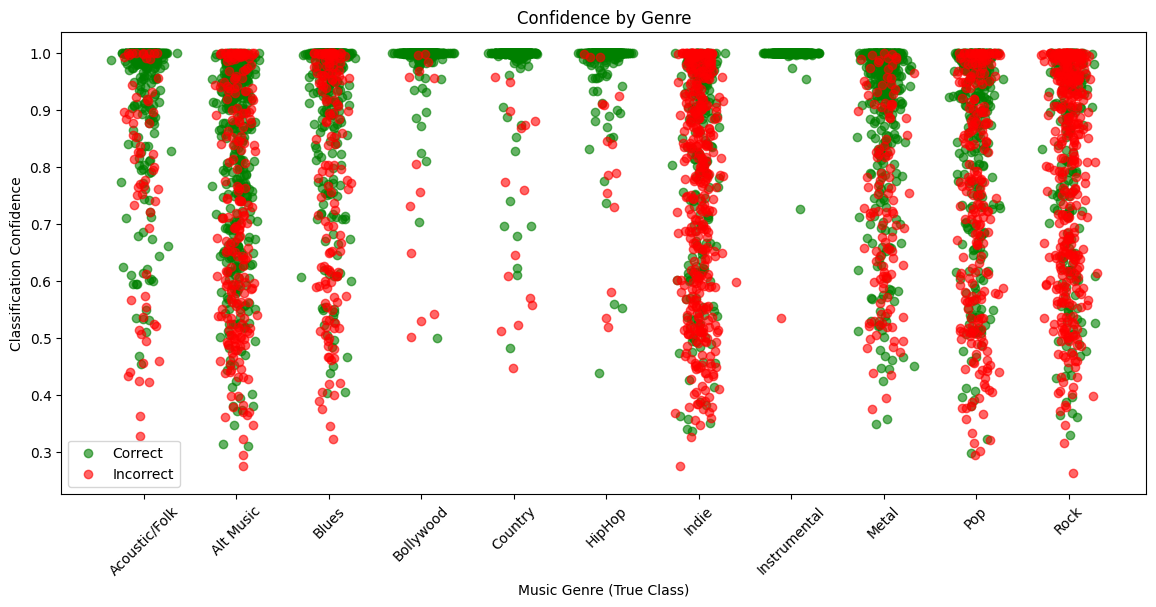


Summary of results by class:
            Corrects  Incorrects  Average_Confidence
Real Genre                                          
0                530          63            0.943143
1                377         217            0.782672
2                441         153            0.901665
3                581          13            0.991776
4                579          15            0.987053
5                578          15            0.988077
6                219         375            0.775437
7                593           1            0.998543
8                480         114            0.884952
9                365         228            0.826261
10               210         383            0.807303


In [103]:
y_pred_mlp = mlp_model.predict(x_test)
y_proba_mlp = mlp_model.predict_proba(x_test)

confidence = np.max(y_proba_mlp, axis=1)

correct = (y_pred_mlp == y_test)

df_plot = pd.DataFrame({
    'Real Genre': y_test,
    'Predicted Genre': y_pred_mlp,
    'Confidence': confidence,
    'Correct?': correct
}).reset_index(drop=True)

jitter = 0.1 * np.random.randn(len(df_plot))

plt.figure(figsize=(14, 6))

plt.scatter(
    df_plot['Real Genre'][df_plot['Correct?']] + jitter[df_plot['Correct?']],
    df_plot['Confidence'][df_plot['Correct?']],
    color='green', alpha=0.6, label='Correct'
)

plt.scatter(
    df_plot['Real Genre'][~df_plot['Correct?']] + jitter[~df_plot['Correct?']],
    df_plot['Confidence'][~df_plot['Correct?']],
    color='red', alpha=0.6, label='Incorrect'
)

plt.xlabel('Music Genre (True Class)')
plt.ylabel('Classification Confidence')
plt.title('Confidence by Genre')
plt.legend()

unique_classes = sorted(df_plot['Real Genre'].unique())
plt.xticks(
    ticks=unique_classes,
    labels=[genre_mapping[c] for c in unique_classes],
    rotation=45
)

plt.show()

summary = df_plot.groupby('Real Genre').agg(
    Corrects=('Correct?', lambda x: sum(x)),
    Incorrects=('Correct?', lambda x: len(x) - sum(x)),
    Average_Confidence=('Confidence', 'mean')
)

print("\nSummary of results by class:")
print(summary)


From this graph, we can see that the results were very good in most categories, with only a higher error rate in the Rock and Indie genres.


Interestingly, these were the classes with the highest number of initial samples, showing that the large variance in data (even after the pre-processing stage) directly influenced the model's performance. (Remember again that this variance is due to music being something very complex and subjective.)


To finish this notebook, we will add 3 songs to the dataset and see how the model classifies them.
Below are the song titles and how they are classified on the internet (The data is based on the website: https://tunebat.com/):
- Pop: Manchild - Sabrina Carpenter
- Hip-Hop: Lucid Dreams - Juice WRLD
- Indie/Alt Music: Ode to Viceroy - Mac DeMarco


In [110]:
new_songs = pd.DataFrame([
    {
        # Manchild - Sabrina Carpenter (Pop)
        'Popularity': 86.0, 
        'danceability': 0.73,
        'energy': 0.69, 
        'liveness': 0.32, 
        'loudness': -4.500, 
        'speechiness': 0.06,
        'acousticness': 0.12, 
        'instrumentalness': 0.00, 
        'valence': 0.75, 
        'tempo': 123.0 
    },
    {
        # Lucid Dreams - Juice WRLD (Hip-Hop)
        'Popularity': 83.0,
        'danceability': 0.51,
        'energy': 0.57, 
        'liveness': 0.34,
        'loudness': -7.000,  
        'speechiness': 0.20,  
        'acousticness': 0.35, 
        'instrumentalness': 0.00,
        'valence': 0.22, 
        'tempo': 84.0  
    },
    {
        # Ode to Viceroy - Mac DeMarco (Indie/Alt Music)
        'Popularity': 62.0,
        'danceability': 0.52,
        'energy': 0.63, 
        'liveness': 0.12,
        'loudness': -6.000,  
        'speechiness': 0.05,  
        'acousticness': 0.21, 
        'instrumentalness': 0.01,
        'valence': 0.31, 
        'tempo': 95.0  
    }
], index=['Manchild', 'Lucid Dreams', 'Ode to Viceroy'])

genre_predict = mlp_model.predict(new_songs)
genre_confidence = np.max(mlp_model.predict_proba(new_songs), axis=1)

results = pd.DataFrame({
    'Song': new_songs.index,
    'Genre': genre_predict,
    'Confidence (%)': np.round(genre_confidence * 100, 2)
})

results['Genre'] = results['Genre'].map(genre_mapping)

print(results)


             Song      Genre  Confidence (%)
0        Manchild        Pop           99.99
1    Lucid Dreams     HipHop          100.00
2  Ode to Viceroy  Alt Music           52.66


Based on this final test, we can conclude that the MLP model is very good for performing classifications, especially with multiple variables (as in this case). The results were very satisfactory, and despite the musical genre theme being quite broad, the classifications with songs outside the dataset were convincing.
